In [289]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

* use the data from the [file](../data/ab-test.csv), read it to a dataframe and make any modification that
you may find useful to solve the task
* the figsize is still the same, you can choose whatever fontsize you like
* the color palette should be the same as in the example
* the fontsize of the title is 15
* the width of the box lines is 3, the width of the median lines is 2
* at the end of your Jupyter Notebook, create a markdown cell and insert the question:
“What was the IQR of the control group before the newsfeed?” In your answer, put
the approximate value that you can get just by looking at the graph, round it to
the nearest 10

In [290]:
df = pd.read_csv("../data/ab-test.csv", sep=",")
after_df = df[df["time"] == "after"]
before_df = df[df["time"] == "before"]

grouped_diffs_after = [
    after_df[after_df["group"] == g]["diff"].values for g in ["control", "test"]
]
grouped_diffs_before = [
    before_df[before_df["group"] == g]["diff"].values for g in ["control", "test"]
]

In [291]:
BOX_STYLE = {"facecolor": "none", "edgecolor": "green", "linewidth": 3}
WHISKER_COLOR = "red"
CAP_COLOR = "red"
MEDIAN_STYLE = {"color": "red", "linewidth": 2}


def set_up_boxplot_styles(
    boxplot,
) -> None:
    # Удаляем заливку и задаём зелёную обводку
    for patch in boxplot["boxes"]:
        patch.set_facecolor(BOX_STYLE.get("facecolor", "none"))
        patch.set_edgecolor(BOX_STYLE.get("edgecolor", "black"))
        patch.set_linewidth(BOX_STYLE.get("linewidth", 1))

    # Делаем усы красными
    for whisker in boxplot["whiskers"]:
        whisker.set_color(WHISKER_COLOR)

    # Делаем caps красными
    for cap in boxplot["caps"]:
        cap.set_color(CAP_COLOR)

    # Медиана: красная и жирная
    for median in boxplot["medians"]:
        median.set_color(MEDIAN_STYLE.get("color", "black"))
        median.set_linewidth(MEDIAN_STYLE.get("linewidth", 1))


def draw_styled_boxplot(ax, data, title, labels=("control", "test")) -> None:
    box = ax.boxplot(data, tick_labels=labels, patch_artist=True, showmeans=True)
    set_up_boxplot_styles(box)
    ax.set_title(title)
    ax.grid()

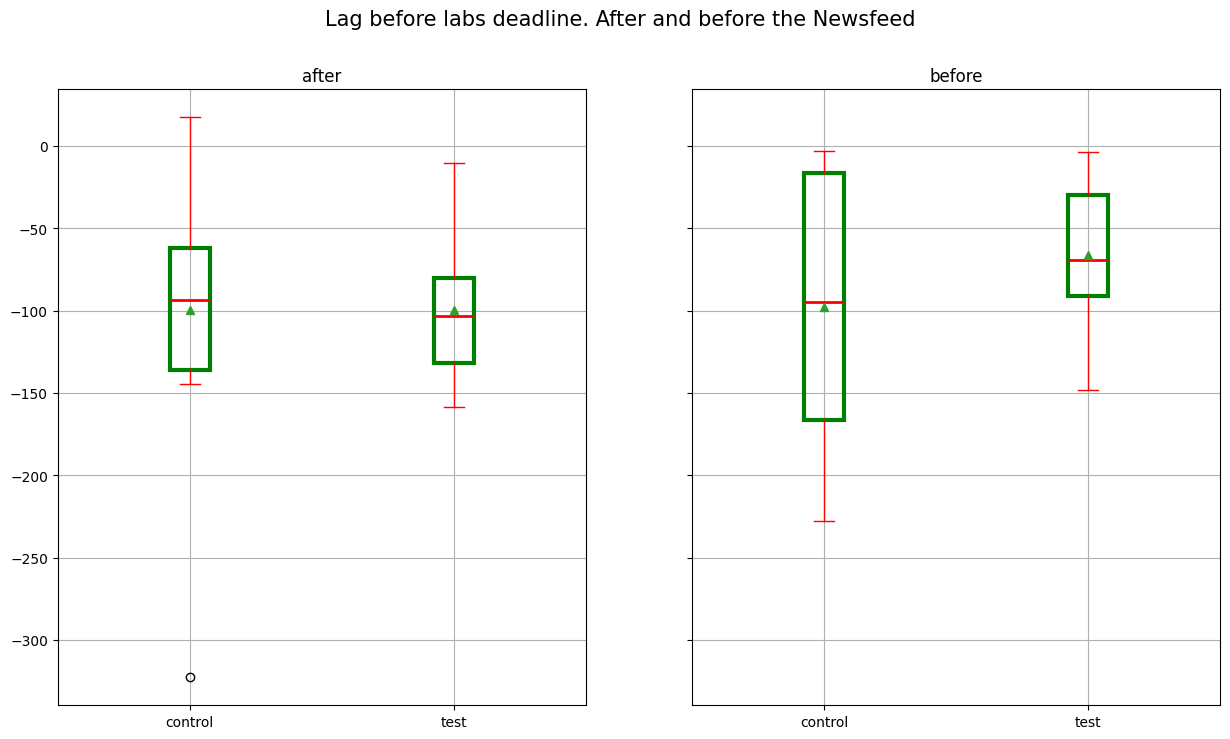

In [292]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharey=True)

draw_styled_boxplot(ax=ax1, data=grouped_diffs_after, title="after")
draw_styled_boxplot(ax=ax2, data=grouped_diffs_before, title="before")

plt.suptitle("Lag before labs deadline. After and before the Newsfeed", fontsize=15)
plt.show()

What was the IQR of the control group before the newsfeed?

- Ответ = -20 + 170 = 150